In [1]:
#Imports
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Helper Functions

#Plot the data on a figure
def plot_data(p1, X, y):
    #Plot class where y==0
    p1.plot(X[y==0,0], X[y==0,1], 'ob', alpha=0.5)
    #Plot class where y==1
    p1.plot(X[y==1,0], X[y==1, 1], 'xr', alpha=0.5)
    p1.legend(['0','1'])
   
    return p1
    

In [3]:
#Common fundtion that draws the decision boundries
def plot_decision_boundry(model, X, y):
    
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]

    #Make prediction with model and reshape the output so countourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)
    
    plt.figure(figsize=(12, 8))
    #Plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    #Plot the moons of data
    plot_data(plt, X, y)
    
    return plt

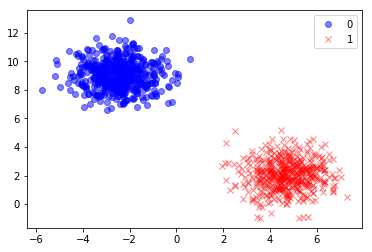

In [4]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)
p1 = plot_data(plt, X, y)
p1.show()


In [5]:
#Split the data into training & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
#Create Keras model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
300/300 [==============================] - 0s 295us/step
('\n\nTest Loss: ', 1.4118973744340715e-06, 'Test Accuracy: ', 1.0)


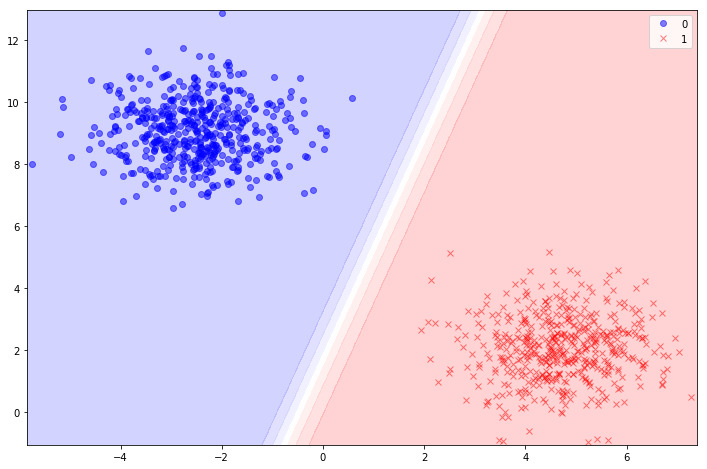

In [7]:
#Simple sequential model
model = Sequential()

#Add a Desnse fully connected layer with 1 neuron. Using input_shape = (2,)
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))

#Compile the model. Minimize crossentropy for binary, Maximize for accuracy
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

#Fit model with data from make_blobs. Make 100 cycles through the data training data. Set verbose to 0 to supress progress messages
model.fit(X_train, y_train, epochs=100, verbose=0)

#Get loss & accuracy on the test
eval_result = model.evaluate(X_test, y_test)

#Print test accuracy
print("\n\nTest Loss: ", eval_result[0], "Test Accuracy: ", eval_result[1])

#Plot the decision boundry
plot_decision_boundry(model, X, y).show()